## Simplex 

Step 1) Draw the solution space with Desmos:
Step 2) Find the corresponding basic solution to the starting point. 
Step 3) Create the correct form for the Optimization problem and create vectors A, b and c.
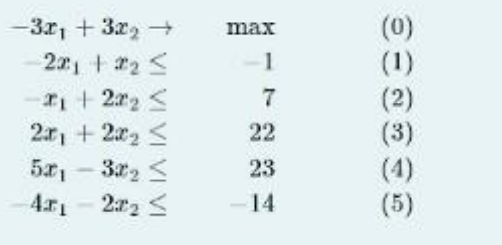
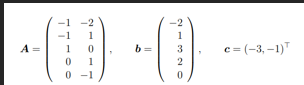

In [34]:
import numpy as np
import sympy as sp

A = np.matrix([[-2, 1], [-1,2],[2,2],[5,-3],[-4,-2]])
b = np.matrix([-1, 7, 22, 23, -14]).T
c = np.matrix([-3, 3])

B = np.array([1,5]) - 1

maximize = True

In [13]:
A = np.matrix([[-1,-2], [-1,1], [1,0], [0,1], [0,-1]])
b = np.matrix([-2,1,3,2,0]).T
c = np.matrix([-3,-1])

B = np.array([1,5]) - 1

maximize = False

In [25]:
# initialize variables (Ex. 3)
A = np.matrix([[-1,1],[1,2],[2,-3],[-1,0],[0,-1]])
b = np.matrix([1,8,2,0,0]).T
c = np.matrix([2,1])

B = np.array([1,2]) - 1

maximize = True

In [35]:
i = 0
while True:
    i += 1
    if i > 10:
        print("no optimum found in 10 iterations!")
        break

    A_B = A[B]
    b_B = b[B]

    print(f"-----------------------------------------\n{i}. Iteration\n-----------------------------------------")
    print(f"B:\n{B+1}\n")
    print(f"A_B:\n{A_B}\n")
    print(f"b_B:\n{b_B}\n")

    rank = np.linalg.matrix_rank(A_B)
    if rank != A_B.shape[1]:
        print(f"basic selection {B} is linearly dependent!")
        break

    A_B_inv = np.matrix(sp.Matrix(A_B).inv())
        
    A_B_inv
    
    v = A_B_inv * b_B
    u = c*A_B_inv

    print(f"A_B_inv (rational/exact):\n{A_B_inv}\n\n{A_B_inv.astype(float)}\n")
    print(f"vertex v (rational/exact):\n{v}\n\n{v.astype(float)}\n")
    print(f"reduced cost u (rational/exact):\n{u}\n\n{u.astype(float)}\n")

    if np.all(u>=0):
        if maximize:
            max_val = c*v
        else:
            max_val = -c*v

        print(f"optimum found with value {max_val}")
        break

    B_out = np.argmin(u)
    print(f"replacing selection at idx {B_out+1}\n")

    d = -A_B_inv[:,B_out]
    print(f"direction d :\n{d}\n")

    if np.all(A*d <= 0):
        print("optimum is infinite")
        break

    lambdas = np.divide(b - A*v, A*d)
    lambdas[B] = np.nan
    lambdas[lambdas<=0] = np.nan
    k = np.nanargmin(lambdas)
    lambda_star = lambdas[k,0]
    
    print(f"A*v (rational/exact):\n{A*v}\n\n{(A*v).astype(float)}\n")
    print(f"A*d (rational/exact):\n{A*d}\n\n{(A*d).astype(float)}\n")
    print(f"distances λ :\n{lambdas}\n")

    print(f"replace {B_out+1}. component in B: {B[B_out]+1} -> {k+1}\n")
    print(f"selected distance λ* = {lambda_star}\n")
    B[B_out] = k
    B = np.sort(B)
    print(f"next vertex at B = {B+1}\n")
    
    v_prime = v + lambda_star * d
    print(f"new vertex v':\n{v_prime}\n")

-----------------------------------------
1. Iteration
-----------------------------------------
B:
[1 5]

A_B:
[[-2  1]
 [-4 -2]]

b_B:
[[ -1]
 [-14]]

A_B_inv (rational/exact):
[[-1/4 -1/8]
 [1/2 -1/4]]

[[-0.25  -0.125]
 [ 0.5   -0.25 ]]

vertex v (rational/exact):
[[2]
 [3]]

[[2.]
 [3.]]

reduced cost u (rational/exact):
[[9/4 -3/8]]

[[ 2.25  -0.375]]

replacing selection at idx 2

direction d :
[[1/8]
 [1/4]]

A*v (rational/exact):
[[-1]
 [4]
 [10]
 [1]
 [-14]]

[[ -1.]
 [  4.]
 [ 10.]
 [  1.]
 [-14.]]

A*d (rational/exact):
[[0]
 [3/8]
 [3/4]
 [-1/8]
 [-1]]

[[ 0.   ]
 [ 0.375]
 [ 0.75 ]
 [-0.125]
 [-1.   ]]

distances λ :
[[nan]
 [8]
 [16]
 [nan]
 [nan]]

replace 2. component in B: 5 -> 2

selected distance λ* = 8

next vertex at B = [1 2]

new vertex v':
[[3]
 [5]]

-----------------------------------------
2. Iteration
-----------------------------------------
B:
[1 2]

A_B:
[[-2  1]
 [-1  2]]

b_B:
[[-1]
 [ 7]]

A_B_inv (rational/exact):
[[-2/3 1/3]
 [-1/3 2/3]]

[[-0.66666

C:\Users\dshus\AppData\Local\Temp\ipykernel_38568\2089617958.py:53: RuntimeWarning: invalid value encountered in less_equal
  lambdas[lambdas<=0] = np.nan
